In [1]:
import pandas as pd
merged_data = pd.read_csv("merged_data.csv")

Only SentimentScore has 176,469 missing values.

# Preprocessing

What to do in preprocessing
- Handling missing values
- Encoding of categorical variables
- Feature scaling

## How to deal with missing values

In [10]:
import pandas as pd
merged_data = pd.read_csv("merged_data.csv")

# Count missing values by 'Ticker'
missing_values_by_ticker = merged_data[merged_data['SentimentScore'].isnull()]['Ticker'].value_counts()

# Convert to DataFrame for visualization
missing_values_df = missing_values_by_ticker.reset_index()
missing_values_df.columns = ['Ticker', 'Missing Values']

# Show the top 10 tickers with the most missing values
top_missing_values = missing_values_df

top_missing_values["Ticker"].head(48).tolist()

['AAPL',
 'CSX',
 'ASML',
 'CDNS',
 'MNST',
 'CHTR',
 'MELI',
 'MRVL',
 'DXCM',
 'NVDA',
 'MCHP',
 'LULU',
 'PCAR',
 'AEP',
 'IDXX',
 'CPRT',
 'EXC',
 'BIIB',
 'AZN',
 'ROST',
 'EA',
 'SGEN',
 'CSGP',
 'BKR',
 'FAST',
 'WBD',
 'ILMN',
 'WBA',
 'FANG',
 'ENPH',
 'EBAY',
 'SNPS',
 'CTAS',
 'ADBE',
 'TSLA',
 'ADI',
 'GOOG',
 'GILD',
 'AMAT',
 'QCOM',
 'ATVI',
 'INTU',
 'HON',
 'PEP',
 'CMCSA',
 'COST',
 'PANW',
 'NFLX']

In [16]:
# Extract rows with missing values
rows_with_missing_values = merged_data[merged_data.isnull().any(axis=1)]

rows_with_missing_values[rows_with_missing_values["Ticker"] == "AAPL"].count()

Date              2518
Open              2518
High              2518
Low               2518
Close             2518
Adj Close         2518
Volume            2518
Ticker            2518
SentimentScore       0
dtype: int64

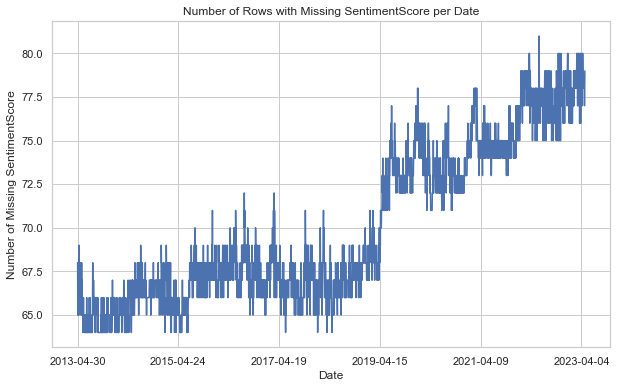

In [23]:
import matplotlib.pyplot as plt

# Create a boolean mask for rows with missing SentimentScore
missing_mask = merged_data['SentimentScore'].isnull()

# Group by date and sum the boolean mask (True is interpreted as 1 and False as 0)
missing_by_date = missing_mask.groupby(merged_data['Date']).sum()

# Plot
plt.figure(figsize=(10,6))
missing_by_date.plot(kind='line')
plt.title('Number of Rows with Missing SentimentScore per Date')
plt.xlabel('Date')
plt.ylabel('Number of Missing SentimentScore')
plt.grid(True)
plt.show()


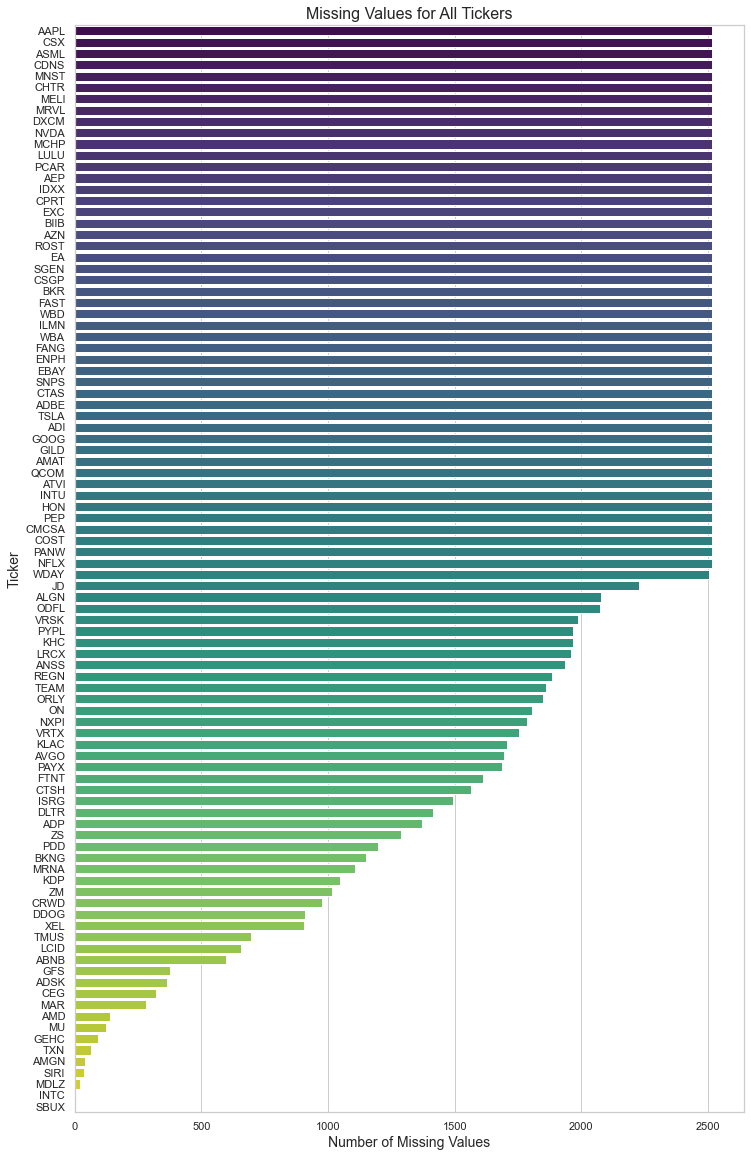

In [19]:
# Set the plot size
plt.figure(figsize=(12, 20))

# Create a bar plot for all tickers
sns.barplot(x='Missing Values', y='Ticker', data=missing_values_df, palette='viridis')

# Set the title and labels
plt.title('Missing Values for All Tickers', size=16)
plt.xlabel('Number of Missing Values', size=14)
plt.ylabel('Ticker', size=14)

# Show the plot
plt.show()
